In [13]:
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt
from PIL import Image
import PIL
%matplotlib inline
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim

In [14]:
import os

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [16]:
img = Image.open('Przechwytywanie.PNG').convert("RGB")
x,y=img.size
final_matrix = np.zeros((x,y,3), dtype=np.uint8)
pix = img.load()

In [17]:
clf = joblib.load("model")
pixel=[]
list_of_colors = [[4,86,22], [4,50,14], [128,128,128],[255,255,153]]
matrix = np.zeros( (x,y,3), dtype=np.uint8 ) ## creating array black image
matrix_test = np.ones( (x,y,3), dtype=np.uint8 )
template=np.zeros( (x,y), dtype=np.uint8 )
template_final=np.zeros( (x,y), dtype=np.uint8 )

In [18]:
for i in range (0,x,1):
    for j in range (0,y,1): 
        pixel.append(pix[i,j])

In [19]:
output=clf.predict(pixel)

In [20]:
iterator=0
for i in range (0,x,1):
    for j in range (0,y,1):
        template[ i, j]=output[iterator]
        iterator+=1

In [25]:
step=5

In [26]:
temp=np.zeros(5)
for i in range (0,x,1):
    for j in range (0,y,1):
        for i2 in range (max(i-step,0),min(i+step,x),1):
            for j2 in range (max(j-step,0),min(j+step,y),1):
                temp[template[i2,j2]]=temp[template[i2,j2]]+1 
        result=temp.argmax()
        template_final[i,j]=result
        temp=np.zeros(5)
for i in range (0,x,1):
    for j in range (0,y,1):
        matrix[i,j]=list_of_colors[template_final[i,j]]
        matrix_test[i,j]=list_of_colors[template[i,j]]

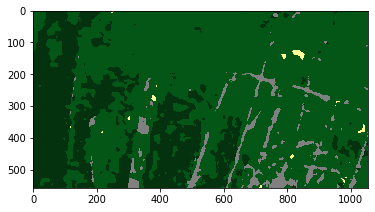

In [27]:
img = Image.fromarray(matrix)
img=img.rotate(-90, Image.NEAREST, expand = 1)
img= img.transpose(PIL.Image.FLIP_LEFT_RIGHT)
plt.imshow(img)

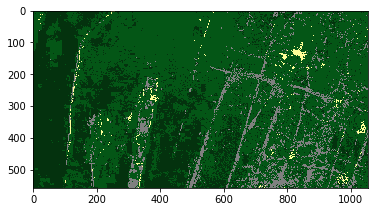

In [28]:
img = Image.fromarray(matrix_test)
img=img.rotate(-90, Image.NEAREST, expand = 1)
img= img.transpose(PIL.Image.FLIP_LEFT_RIGHT)
plt.imshow(img)